In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.linalg import expm, logm
import gvar as gv
import matplotlib as mpl
from  matplotlib import rc, cm
from matplotlib.colors import ListedColormap
import lsqfit
import matplotlib.pyplot as plt


colorsrgb = [(0, 0, 0), (230, 159, 0), (86, 180, 233),
          (0, 158, 115), (240, 228, 66), (0, 114, 178),
          (213, 94, 0), (204, 121, 167)]

fmts = ['o', 'd', 's', '^', '<', '8', '6', 'd', 'x']
colors = [tuple([el / 255 for el in c]) for c in colorsrgb]

mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = "Times New Roman"
mpl.rcParams.keys()
# mpl.rcParams["text.fontset"] = "Times New Roman"
mpl.rcParams["mathtext.fontset"] = "stix"

# 1. Relative shift from readout versus machine run
this makes a plot of the relative readout shift across all the simulations run

In [2]:
with open('readouts.pkl', 'rb') as infile:
    rshifts = pickle.load(infile)
    infile.close()

Version 1. Same color and markers across all plots

/var/folders/df/plqx6fgd0_v3630nqhpjszf80000gq/T/ipykernel_59721/3190698570.py:19: RuntimeWarning: divide by zero encountered in divide
  rshifts[(7, 1)][i][0].flatten() / xpts,
/var/folders/df/plqx6fgd0_v3630nqhpjszf80000gq/T/ipykernel_59721/3190698570.py:45: RuntimeWarning: divide by zero encountered in divide
  rshifts[(7, 2)][0][0].flatten() / xpts,


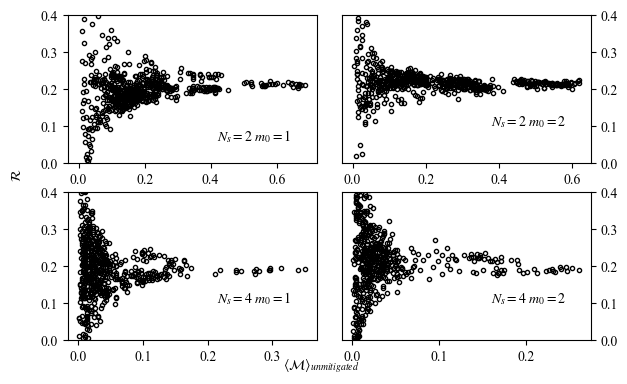

In [3]:
fig, ax = plt.subplots(ncols=2, nrows=2)

counter = 0
for i in range(1):
    xpts = np.abs(rshifts[(3, 1)][i][1].flatten())
    ax[0, 0].plot(np.abs(rshifts[(3, 1)][i][1].flatten()),
             rshifts[(3, 1)][i][0].flatten() / xpts,
             marker=fmts[counter], color=colors[counter],
             fillstyle='none',
             linestyle='none', markersize=3, label='ibm_nairobi')
ax[0, 0].annotate(r'$N_s = 2$ $m_0 = 1$',(0.75, 0.15), 
                  xycoords='axes fraction',
                  horizontalalignment='center')

counter = 0
for i in range(1, 2):
    xpts = np.abs(rshifts[(7, 1)][i][1].flatten())
    ax[1, 0].plot(np.abs(rshifts[(7, 1)][i][1].flatten()),
             rshifts[(7, 1)][i][0].flatten() / xpts,
             marker=fmts[counter], color=colors[counter],
             fillstyle='none',
             linestyle='none', markersize=3, label='ibm_nairobi')
ax[1, 0].annotate(r'$N_s = 4$ $m_0 = 1$',(0.75, 0.25), 
                  xycoords='axes fraction',
                  horizontalalignment='center')


counter = 0
xpts = np.abs(rshifts[(3, 2)][1][1].flatten())
ax[0, 1].plot(np.abs(rshifts[(3, 2)][1][1].flatten()),
          rshifts[(3, 2)][1][0].flatten() / xpts,
          marker=fmts[counter], color=colors[counter],
          fillstyle='none',
          linestyle='none', markersize=3, label='ibm_nairobi')
counter = 1

ax[0, 1].yaxis.tick_right()
ax[0, 1].annotate(r'$N_s = 2$ $m_0 = 2$',(0.75, 0.25), 
                  xycoords='axes fraction',
                  horizontalalignment='center')

counter = 0
xpts = np.abs(rshifts[(7, 2)][0][1].flatten())
ax[1, 1].plot(np.abs(rshifts[(7, 2)][0][1].flatten()),
         rshifts[(7, 2)][0][0].flatten() / xpts,
         marker=fmts[counter], color=colors[counter],
         fillstyle='none',
         linestyle='none', markersize=3, label='ibm_nairobi')
ax[1, 1].yaxis.tick_right()
# ax[1, 1].legend(framealpha=0)
ax[1, 1].annotate(r'$N_s = 4$ $m_0 = 2$',(0.75, 0.25), 
                  xycoords='axes fraction',
                  horizontalalignment='center')
for i in range(4):
    ax[i // 2, i % 2].set_ylim(0, 0.4)
fig.text(0.05, 0.5, r'$\mathcal{R}$',
         horizontalalignment='center', verticalalignment='center',
         rotation=90)

fig.text(0.5, 0.05, r'$\langle \mathcal{M} \rangle_{unmitigated}$',
         horizontalalignment='center', verticalalignment='center')

fig.set_size_inches((6.75, 6.75 / 1.6))
# fig.tight_layout()
fig.subplots_adjust(wspace=0.1)
fig.savefig('plots/readoutversusmachinev1.pdf')

Version 2. Different colors for different simulation runs

/var/folders/df/plqx6fgd0_v3630nqhpjszf80000gq/T/ipykernel_59721/3494440552.py:19: RuntimeWarning: divide by zero encountered in divide
  rshifts[(7, 1)][i][0].flatten() / xpts,
/var/folders/df/plqx6fgd0_v3630nqhpjszf80000gq/T/ipykernel_59721/3494440552.py:45: RuntimeWarning: divide by zero encountered in divide
  rshifts[(7, 2)][0][0].flatten() / xpts,


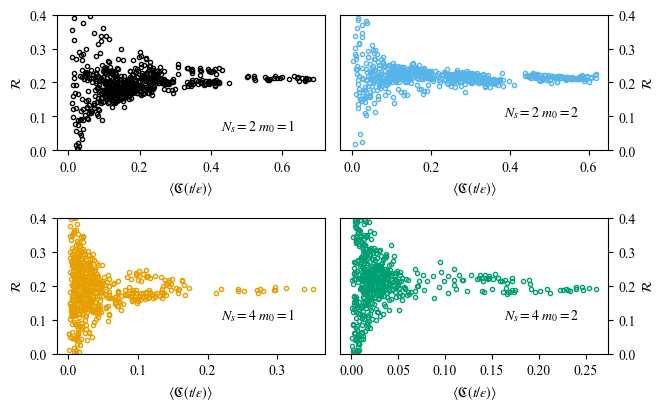

In [9]:
fig, ax = plt.subplots(ncols=2, nrows=2)

counter = 0
for i in range(1):
    xpts = np.abs(rshifts[(3, 1)][i][1].flatten())
    ax[0, 0].plot(np.abs(rshifts[(3, 1)][i][1].flatten()),
             rshifts[(3, 1)][i][0].flatten() / xpts,
             marker=fmts[counter], color=colors[counter],
             fillstyle='none',
             linestyle='none', markersize=3, label='ibm_nairobi')
ax[0, 0].annotate(r'$N_s = 2$ $m_0 = 1$',(0.75, 0.15), 
                  xycoords='axes fraction',
                  horizontalalignment='center')

counter = 1
for i in range(1, 2):
    xpts = np.abs(rshifts[(7, 1)][i][1].flatten())
    ax[1, 0].plot(np.abs(rshifts[(7, 1)][i][1].flatten()),
             rshifts[(7, 1)][i][0].flatten() / xpts,
             marker=fmts[0], color=colors[counter],
             fillstyle='none',
             linestyle='none', markersize=3, label='ibm_nairobi')
ax[1, 0].annotate(r'$N_s = 4$ $m_0 = 1$',(0.75, 0.25), 
                  xycoords='axes fraction',
                  horizontalalignment='center')


counter = 2
xpts = np.abs(rshifts[(3, 2)][1][1].flatten())
ax[0, 1].plot(np.abs(rshifts[(3, 2)][1][1].flatten()),
          rshifts[(3, 2)][1][0].flatten() / xpts,
          marker=fmts[0], color=colors[counter],
          fillstyle='none',
          linestyle='none', markersize=3, label='ibm_nairobi')
counter = 1

ax[0, 1].yaxis.tick_right()
ax[0, 1].annotate(r'$N_s = 2$ $m_0 = 2$',(0.75, 0.25), 
                  xycoords='axes fraction',
                  horizontalalignment='center')

counter = 3
xpts = np.abs(rshifts[(7, 2)][0][1].flatten())
ax[1, 1].plot(np.abs(rshifts[(7, 2)][0][1].flatten()),
         rshifts[(7, 2)][0][0].flatten() / xpts,
         marker=fmts[0], color=colors[counter],
         fillstyle='none',
         linestyle='none', markersize=3, label='ibm_nairobi')
ax[1, 1].yaxis.tick_right()
# ax[1, 1].legend(framealpha=0)
ax[1, 1].annotate(r'$N_s = 4$ $m_0 = 2$',(0.75, 0.25), 
                  xycoords='axes fraction',
                  horizontalalignment='center')
for i in range(4):
    ax[i // 2, i % 2].set_ylim(0, 0.4)
    ax[i // 2, i % 2].set_xlabel(r'$\langle \mathfrak{C}(t/\epsilon)\rangle$')
    ax[i // 2, i % 2].set_ylabel(r'$\mathcal{R}$')
    if i % 2 == 1:
        ax[i // 2, i % 2].yaxis.set_label_position("right")
# fig.text(0.05, 0.5, r'$\mathcal{R}$',
#          horizontalalignment='center', verticalalignment='center',
#          rotation=90)

# fig.text(0.5, 0.05, r'$\langle \mathcal{M} \rangle_{unmitigated}$',
#          horizontalalignment='center', verticalalignment='center')

fig.set_size_inches((6.75, 6.75 / 1.6))
fig.tight_layout()
# fig.subplots_adjust(wspace=0.1)
fig.savefig('plots/readoutversusmachinev2.pdf')

# Figure 6 construct

asymmetric confidence int

In [5]:
file = np.load('erroranalysis/DataProcessor/bootstrapreadoutnq=3pnum=1.npy')

In [6]:
file_2 = np.zeros((200, 20, 30))
for i in range(200):
    file_2[i] += np.sum(file[10 * i: 10 * (i + 1)], axis=0) / 10

In [7]:
gauss_file = gv.gvar(file_2, np.sqrt(1 - file_2 ** 2) / np.sqrt(2000))

In [8]:
boot_vars_1 = []
boot_vars_2 = []
nboot = 200
gv_iter = gv.raniter(gauss_file)
for j in range(nboot):
    print(j)
    dset = next(gv_iter)
    avg_1 = np.average(dset, axis=2)
    avg_2 = np.average(dset, axis=0)
    avg_21 = np.average(avg_2, axis=1)
    avg_12 = np.average(avg_1, axis=0)
    sdev_21 = np.std(avg_2, axis=1) / np.sqrt(30)
    sdev_12 = np.std(avg_1, axis=0)
    boot_vars_1.append(sdev_12)
    boot_vars_2.append(sdev_21)
boot_vars_1 = np.array(boot_vars_1)
boot_vars_2 = np.array(boot_vars_2)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [9]:
boot_vars_1 = np.std(boot_vars_1, axis=0)
boot_vars_2 = np.std(boot_vars_2, axis=0)

In [10]:

avg_1 = np.average(file, axis=2)
avg_2 = np.average(file, axis=0)
avg_21 = np.average(avg_2, axis=1)
avg_12 = np.average(avg_1, axis=0)
sdev_21 = np.std(avg_2, axis=1) / np.sqrt(30)# / np.abs(avg_21)
sdev_12 = np.std(avg_1, axis=0)# / np.abs(avg_12)

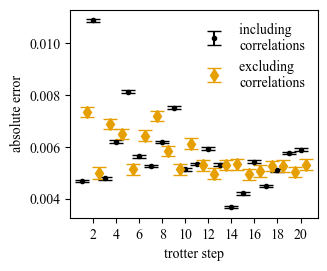

In [11]:
plt.figure(figsize=(3.375, 3.375 / 1.2))
# plt.errorbar(np.arange(1, 21, 1), np.zeros(20), fmt='.', color=colors[0], yerr=sdev_21, capsize=3,
#             label='including \ncorrelations')
# plt.errorbar(np.arange(1, 21, 1)+0.5, np.zeros(20), fmt='.', color=colors[1], yerr=sdev_12, capsize=3,
#             label='excluding \ncorrelations')
# plt.plot(np.arange(1, 21, 1), sdev_21, '.', color=colors[0], 
#             label='including \ncorrelations')
# plt.plot(np.arange(1, 21, 1)+0.5, sdev_12, 'd', color=colors[1], 
#             label='excluding \ncorrelations')
plt.errorbar(np.arange(1, 21, 1), sdev_21, yerr=boot_vars_2, fmt='.', capsize=5, color=colors[0], 
            label='including \ncorrelations')
plt.errorbar(np.arange(1, 21, 1)+0.5, sdev_12, yerr=boot_vars_1, fmt='d', capsize=5, color=colors[1], 
            label='excluding \ncorrelations')
plt.ylabel('absolute error')
plt.xlabel('trotter step')
plt.xticks([2 * i for i in range(1, 11)])
plt.legend(framealpha=0)
plt.tight_layout()
plt.savefig('relativecomparisonoferrorbars.pdf')

/var/folders/df/plqx6fgd0_v3630nqhpjszf80000gq/T/ipykernel_24692/1352229013.py:12: RuntimeWarning: divide by zero encountered in divide
  ypts2 = np.abs(rshifts[key][1][0] / rshifts[key][1][1])
/var/folders/df/plqx6fgd0_v3630nqhpjszf80000gq/T/ipykernel_24692/1352229013.py:29: RuntimeWarning: divide by zero encountered in divide
  ypts4 = np.abs(rshifts[key][0][0] / rshifts[key][0][1])


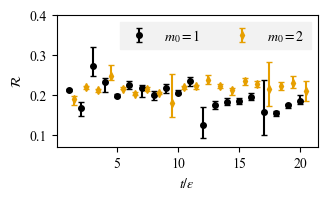

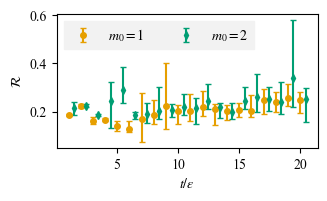

In [12]:
xpts = np.array([i + 1 for i in range(20)], dtype='int64')
key = (3, 1)
counter = 0
ypts1 = np.abs(rshifts[key][0][0] / rshifts[key][0][1])
# ax.boxplot(ypts1, sym='', whis=1, whiskerprops={'color': colors[counter]},
#             medianprops={'color': colors[counter]}, boxprops={'color': colors[counter]},
#             bootstrap=2000, widths=0.2, capprops={'color': colors[counter]},
#             positions=xpts + counter * 0.25)
key = (7, 1)

counter = 1
ypts2 = np.abs(rshifts[key][1][0] / rshifts[key][1][1])
# ax.boxplot(ypts1, sym='', whis=1, whiskerprops={'color': colors[counter]},
#             medianprops={'color': colors[counter]}, boxprops={'color': colors[counter]},
#             bootstrap=2000, widths=0.2, capprops={'color': colors[counter]},
#             positions=xpts + counter * 0.25)


key = (3, 2)
counter = 2
ypts3 = np.abs(rshifts[key][1][0] / rshifts[key][1][1])
# ax.boxplot(ypts1, sym='', whis=1, whiskerprops={'color': colors[counter]},
#             medianprops={'color': colors[counter]}, boxprops={'color': colors[counter]},
#             bootstrap=2000, widths=0.2, capprops={'color': colors[counter]},
#             positions=xpts + counter * 0.25)
key = (7, 2)

counter = 3
ypts4 = np.abs(rshifts[key][0][0] / rshifts[key][0][1])
# ax.boxplot(ypts1, sym='', whis=1, whiskerprops={'color': colors[counter]},
#             medianprops={'color': colors[counter]}, boxprops={'color': colors[counter]},
#             bootstrap=2000, widths=0.2, capprops={'color': colors[counter]},
#             positions=xpts + counter * 0.25)
# print([str(np.round(label, decimals=0)) for label in xpts])
# ax.xaxis.set_ticks(np.array(xpts, dtype='int64'))
# ax.xaxis.set_ticklabels([''] * 4 + ['5'] + [''] * 4 + ['10'] + [''] * 4 + ['15'] + [''] * 4 + ['20'])
# fig.set_size_inches((3.375 * 2, 3.375 / 1.6 * 2))
# ax.set_xlabel(r'$t / \epsilon$')
# ax.set_ylabel(r'$\mathcal{R}$')
# fig.savefig('plots/fig6test.pdf')


low, high = 0.25, 0.75
plt.figure(figsize=(3.375, 3.375 / 1.6))
ypts1_q = np.quantile(ypts1, [low, 0.5, high], axis=0)
lowe, ypts1_qm, highe = ypts1_q[0], ypts1_q[1], ypts1_q[2]
lowe = ypts1_qm - lowe
highe = highe - ypts1_qm
plt.errorbar(xpts, ypts1_qm, yerr=[lowe, highe], fmt=fmts[0], color=colors[0], capsize=2, markersize=4,
             label=r'$m_0 = 1$')


ypts1_q = np.quantile(ypts3, [low, 0.5, high], axis=0)
lowe, ypts1_qm, highe = ypts1_q[0], ypts1_q[1], ypts1_q[2]
lowe = ypts1_qm - lowe
highe = highe - ypts1_qm
plt.errorbar(xpts + 0.45, ypts1_qm, yerr=[lowe, highe], fmt=fmts[1], color=colors[1], capsize=2, markersize=4,
             label=r'$m_0 = 2$')

plt.legend(framealpha=1, shadow=False, edgecolor=(0.95, 0.95, 0.95),
           facecolor=(0.95, 0.95, 0.95), ncol=2, fancybox=False)
plt.ylim(0.07, 0.4)
plt.xlabel(r'$t / \epsilon$')
plt.ylabel(r'$\mathcal{R}$')
plt.tight_layout()
plt.savefig('plots/fig6version2smallvolume.pdf')



low, high = 0.25, 0.75
plt.figure(figsize=(3.375, 3.375 / 1.6))
ypts1_q = np.quantile(ypts2, [low, 0.5, high], axis=0)
lowe, ypts1_qm, highe = ypts1_q[0], ypts1_q[1], ypts1_q[2]
lowe = ypts1_qm - lowe
highe = highe - ypts1_qm
plt.errorbar(xpts, ypts1_qm, yerr=[lowe, highe], fmt=fmts[0], color=colors[1], capsize=2, markersize=4,
             label=r'$m_0 = 1$')


ypts1_q = np.quantile(ypts4, [low, 0.5, high], axis=0)
lowe, ypts1_qm, highe = ypts1_q[0], ypts1_q[1], ypts1_q[2]
lowe = ypts1_qm - lowe
highe = highe - ypts1_qm
plt.errorbar(xpts + 0.45, ypts1_qm, yerr=[lowe, highe], fmt=fmts[1], color=colors[3], capsize=2, markersize=4,
             label=r'$m_0 = 2$')

plt.legend(framealpha=1, shadow=False, edgecolor=(0.95, 0.95, 0.95),
           facecolor=(0.95, 0.95, 0.95), ncol=2, fancybox=False)
# plt.ylim(0.07, 0.4)
plt.xlabel(r'$t / \epsilon$')
plt.ylabel(r'$\mathcal{R}$')
plt.tight_layout()
plt.savefig('plots/fig6version2largevolume.pdf')



# plt.figure(figsize=(3.375, 3.375 / 1.6))

# ypts1_q = np.quantile(ypts2, [low, 0.5, high], axis=0)
# ypts1_qm = ypts1_q[1]
# width = np.diff(ypts1_q[::2], axis=0) / 2
# mid = np.mean(ypts1_q[::2], axis=0) 
# plt.errorbar(xpts + 0.25, mid, yerr=width, fmt=' ', color=colors[1], capsize=2)
# plt.plot(xpts , ypts1_qm, fmts[1], color=colors[1], markersize=4)

# ypts1_q = np.quantile(ypts4, [low, 0.5, high], axis=0)
# ypts1_qm = ypts1_q[1]
# width = np.diff(ypts1_q[::2], axis=0) / 2
# mid = np.mean(ypts1_q[::2], axis=0) 
# plt.errorbar(xpts + 0.75, mid, yerr=width, fmt=' ', color=colors[3], capsize=2)
# plt.plot(xpts + 0.5, ypts1_qm, fmts[3], color=colors[3], markersize=4)
# plt.xlabel(r'$t / \epsilon$')
# plt.ylabel(r'$\mathcal{R}$')
# plt.savefig('plots/fig6version2largevolume.pdf')
# key = (7, 1)
# ypts2 = rshifts[key][1][0]
# key = (3, 2)
# ypts3 = rshifts[key][1][0]
# key = (7, 2)
# ypts4 = rshifts[key][0][0]

# Make correlated readout error plot

In [13]:
file = np.load('erroranalysis/DataProcessor/bootstrapreadoutnq=3pnum=1.npy')

In [14]:
file_2 = np.zeros((200, 20, 30))
for i in range(200):
    file_2[i] += np.sum(file[10 * i: 10 * (i + 1)], axis=0) / 10

In [15]:
gauss_file = gv.gvar(file_2, np.sqrt(1 - file_2 ** 2) / np.sqrt(2000))

In [16]:
boot_vars_1 = []
boot_vars_2 = []
nboot = 200
gv_iter = gv.raniter(gauss_file)
for j in range(nboot):
    print(j)
    dset = next(gv_iter)
    avg_1 = np.average(dset, axis=2)
    avg_2 = np.average(dset, axis=0)
    avg_21 = np.average(avg_2, axis=1)
    avg_12 = np.average(avg_1, axis=0)
    sdev_21 = np.std(avg_2, axis=1) / np.sqrt(30)
    sdev_12 = np.std(avg_1, axis=0)
    boot_vars_1.append(sdev_12)
    boot_vars_2.append(sdev_21)
boot_vars_1 = np.array(boot_vars_1)
boot_vars_2 = np.array(boot_vars_2)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [17]:
boot_vars_1 = np.std(boot_vars_1, axis=0)
boot_vars_2 = np.std(boot_vars_2, axis=0)

In [18]:

avg_1 = np.average(file, axis=2)
avg_2 = np.average(file, axis=0)
avg_21 = np.average(avg_2, axis=1)
avg_12 = np.average(avg_1, axis=0)
sdev_21 = np.std(avg_2, axis=1) / np.sqrt(30)# / np.abs(avg_21)
sdev_12 = np.std(avg_1, axis=0)# / np.abs(avg_12)

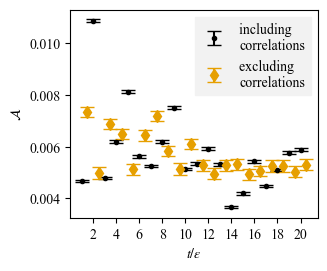

In [19]:
plt.figure(figsize=(3.375, 3.375 / 1.2))
# plt.errorbar(np.arange(1, 21, 1), np.zeros(20), fmt='.', color=colors[0], yerr=sdev_21, capsize=3,
#             label='including \ncorrelations')
# plt.errorbar(np.arange(1, 21, 1)+0.5, np.zeros(20), fmt='.', color=colors[1], yerr=sdev_12, capsize=3,
#             label='excluding \ncorrelations')
# plt.plot(np.arange(1, 21, 1), sdev_21, '.', color=colors[0], 
#             label='including \ncorrelations')
# plt.plot(np.arange(1, 21, 1)+0.5, sdev_12, 'd', color=colors[1], 
#             label='excluding \ncorrelations')
plt.errorbar(np.arange(1, 21, 1), sdev_21, yerr=boot_vars_2, fmt='.', capsize=5, color=colors[0], 
            label='including \ncorrelations')
plt.errorbar(np.arange(1, 21, 1)+0.5, sdev_12, yerr=boot_vars_1, fmt='d', capsize=5, color=colors[1], 
            label='excluding \ncorrelations')
plt.ylabel('$\mathcal{A}$')
plt.xlabel(r'$t/\epsilon$')
plt.xticks([2 * i for i in range(1, 11)])
plt.legend(framealpha=1, shadow=False, edgecolor=(0.95, 0.95, 0.95),
           facecolor=(0.95, 0.95, 0.95), ncol=1, fancybox=False)
plt.tight_layout()
plt.savefig('plots/relativecomparisonoferrorbars.pdf')

In [20]:
file = gv.load('erroranalysis/DataProcessor/fullsetreadoutcorrelations.pkl')

In [21]:
file[(7, 1)]

array([[[0.268(26), -0.252(26), -0.217(26), ..., 0.090(27), 0.268(26),
         -0.252(26)],
        [0.285(27), -0.156(27), -0.282(26), ..., 0.079(27), 0.285(27),
         -0.156(27)],
        [0.278(27), -0.349(26), -0.338(26), ..., 0.084(27), 0.278(27),
         -0.349(26)],
        ...,
        [0.264(27), -0.315(27), -0.208(27), ..., 0.088(27), 0.264(27),
         -0.315(27)],
        [0.333(26), -0.250(26), -0.301(26), ..., 0.143(27), 0.333(26),
         -0.250(26)],
        [0.303(26), -0.365(26), -0.336(26), ..., 0.167(27), 0.303(26),
         -0.365(26)]],

       [[0.649(23), 0.514(27), 0.328(27), ..., 0.042(29), 0.649(23),
         0.514(27)],
        [0.616(24), 0.555(24), 0.308(28), ..., 0.163(27), 0.616(24),
         0.555(24)],
        [0.632(24), 0.490(24), 0.390(25), ..., 0.032(29), 0.632(24),
         0.490(24)],
        ...,
        [0.620(24), 0.518(25), 0.342(27), ..., 0.149(27), 0.620(24),
         0.518(25)],
        [0.622(25), 0.581(24), 0.295(28), ..., 0.116(2

In [22]:
key = (3, 1)
points_r = file[key][1]
points_o = file[key][0]
final = np.zeros(20, dtype=gv._gvarcore.GVar)
for i in range(20):
    final[i] += lsqfit.wavg(points_r[:, i])
flag = np.array([1, 1, 1, 1, 1, 0.8, 0.8, 0.8, 0.8, 0.8,
                 1.3, 1.3, 1.3, 1.3, 1.3, 0.8, 0.8, 0.8, 0.8, 0.8])
# final = np.ones(20)
final_r = final#final * flag - 0.02
    
    
final_o = np.zeros(20, dtype=gv._gvarcore.GVar)
for i in range(20):
    final_o[i] += lsqfit.wavg(points_o[:, i])
    
final_ro = final_o / final_r

In [23]:
arr = np.zeros((1 + len(final_o), len(final_o)))
arr[0] += gv.mean(final_o)
arr[1:] += gv.evalcov(final_o)
np.savetxt(f'ProcessedData/m={key[1]}ns={(key[0] - 1) // 2 + 1}/finalreadoutdynamicdecoupling_nairobi.csv', arr)
arr = np.zeros((1 + len(final_r), len(final_r)))
arr[0] += gv.mean(final_ro)
arr[1:] += gv.evalcov(final_ro)
np.savetxt(f'ProcessedData/m={key[1]}ns={(key[0] - 1) // 2 + 1}/finalreadoutdynamicdecouplingandrescaling_nairobi.csv', arr)
# ndd = gv.gvar(np.array([ 0.72646123,  0.21821433, -0.21599768, -0.46893008, -0.44978976,
#         -0.20574842,  0.05930803,  0.19030418,  0.30784389,  0.29361427,
#          0.13152949, -0.03254466, -0.17671327, -0.21662935, -0.22573839,
#         -0.13201323,  0.02420206,  0.13919184,  0.17182621,  0.12540779]),
#  np.array([0.06764798, 0.09098477, 0.07821429, 0.04180775, 0.03340954,
#         0.0518484 , 0.05116065, 0.04907045, 0.03618597, 0.02755369,
#         0.04138756, 0.03731357, 0.03286512, 0.03074664, 0.02801247,
#         0.04319589, 0.04989995, 0.02767561, 0.02995154, 0.02889463]))
# arr = np.zeros((2, len(ndd)))
# arr[0] += gv.mean(ndd)
# arr[1] += gv.sdev(ndd)
# np.savetxt('ProcessedData/m=1ns=2/finalreadoutnodynamicdecoupling_nairobi.csv', arr)
# ndd_r = gv.gvar(np.array([  0.78288807,   0.27608491,  -0.38714226,  -1.57584575,
#         -13.04200066,   1.94494731,  -0.18846142,  -0.48254276,
#          -0.8058741 ,  -0.93967716,  -0.66916337,   0.24366148,
#           8.15313364,  -2.83672059,  -1.92643437,  -1.05413678,
#           0.22809407,   2.56511891, -71.80942961,  -2.4036483 ]),
#  np.array([7.30537163e-02, 1.15181447e-01, 1.40649566e-01, 1.89237143e-01,
#         6.71498708e+00, 6.03723404e-01, 1.63055823e-01, 1.25282210e-01,
#         9.51738358e-02, 9.04299696e-02, 2.12813547e-01, 2.80022698e-01,
#         4.28980859e+00, 4.84806610e-01, 2.64273402e-01, 3.48151686e-01,
#         4.70374003e-01, 5.76567251e-01, 1.69951119e+02, 5.90391170e-01]))
# arr = np.zeros((2, len(ndd_r)))
# arr[0] += gv.mean(ndd_r)
# arr[1] += gv.sdev(ndd_r)
# np.savetxt('ProcessedData/m=1ns=2/finalreadoutnodynamicdecouplingandrescaling_nairobi.csv', arr)

In [24]:
data_arr = {'dd w/o rescaling': [gv.mean(final_o), gv.sdev(final_o)],
            'dd w/ rescaling': [gv.mean(final_ro), gv.sdev(final_ro)],
            'no dd w/o rescaling': [gv.mean(ndd), gv.sdev(ndd)],
            'no dd w/ rescaling': [gv.mean(ndd_r), gv.sdev(ndd_r)]}

NameError: name 'ndd' is not defined

In [ ]:

exact3 = np.array([
 0.611,
 -0.252,
 -0.8830000000000001,
 -0.8220000000000002,
 -0.10900000000000003,
 0.689,
 0.9960000000000001,
 0.537,
 -0.29799999999999993,
 -0.8810000000000001,
 -0.7659999999999999,
 0.010000000000000009,
 0.7550000000000001,
 0.976,
 0.46199999999999997,
 -0.396,
 -0.9229999999999999,
 -0.7050000000000001,
 0.03600000000000003,
 0.8380000000000001])

ndd = gv.gvar(np.array([ 0.72646123,  0.21821433, -0.21599768, -0.46893008, -0.44978976,
        -0.20574842,  0.05930803,  0.19030418,  0.30784389,  0.29361427,
         0.13152949, -0.03254466, -0.17671327, -0.21662935, -0.22573839,
        -0.13201323,  0.02420206,  0.13919184,  0.17182621,  0.12540779]),
 np.array([0.06764798, 0.09098477, 0.07821429, 0.04180775, 0.03340954,
        0.0518484 , 0.05116065, 0.04907045, 0.03618597, 0.02755369,
        0.04138756, 0.03731357, 0.03286512, 0.03074664, 0.02801247,
        0.04319589, 0.04989995, 0.02767561, 0.02995154, 0.02889463]))

ndd_r = gv.gvar(np.array([  0.78288807,   0.27608491,  -0.38714226,  -1.57584575,
        -13.04200066,   1.94494731,  -0.18846142,  -0.48254276,
         -0.8058741 ,  -0.93967716,  -0.66916337,   0.24366148,
          8.15313364,  -2.83672059,  -1.92643437,  -1.05413678,
          0.22809407,   2.56511891, -71.80942961,  -2.4036483 ]),
 np.array([7.30537163e-02, 1.15181447e-01, 1.40649566e-01, 1.89237143e-01,
        6.71498708e+00, 6.03723404e-01, 1.63055823e-01, 1.25282210e-01,
        9.51738358e-02, 9.04299696e-02, 2.12813547e-01, 2.80022698e-01,
        4.28980859e+00, 4.84806610e-01, 2.64273402e-01, 3.48151686e-01,
        4.70374003e-01, 5.76567251e-01, 1.69951119e+02, 5.90391170e-01]))
ms = 7
plt.figure(figsize=(3.375 * 2, 3.375 / 1.2))
plt.plot(np.linspace(1, 20, 20), exact3, 'o', 
         markersize=ms, color=colors[0], label='expected', zorder=100)
plt.errorbar(np.linspace(1, 20, 20), gv.mean(ndd), yerr=gv.sdev(ndd),
             capsize=5, fmt=fmts[1], markersize=ms, color=colors[1], label='unmitigated')
xspecial = []
ndd_rs = []
for i in range(len(ndd_r)):
    if gv.mean(ndd_r[i]) > 1.5 or gv.mean(ndd_r[i]) < -2:
        continue
    if gv.mean(ndd_r[i]) - gv.sdev(ndd_r[i]) < -2:
        continue
    else:
        xspecial.append(i + 1)
        ndd_rs.append(ndd_r[i])
plt.errorbar(xspecial, gv.mean(ndd_rs), yerr=gv.sdev(ndd_rs),
             capsize=5, fmt=fmts[2], color=colors[2], markersize=ms,
             label='rescaled')
plt.errorbar(np.linspace(1, 20, 20), gv.mean(final_o), yerr=gv.sdev(final_o),
             capsize=5, fmt=fmts[3], color=colors[3], label='DD', markersize=ms)
xspecial = []
final_ros = []
for i in range(len(final_ro)):
    if gv.mean(final_ro[i]) > 2 or gv.mean(final_ro[i]) < -2:
        continue
    if gv.mean(final_ro[i]) - gv.sdev(final_ro[i]) < -2:
        continue
    else:
        xspecial.append(i + 1)
        final_ros.append(final_ro[i])
        
plt.errorbar(xspecial, gv.mean(final_ros), yerr=gv.sdev(final_ros),
             capsize=5, fmt=fmts[5], color=colors[5], markersize=ms,
             label='DD and rescaled')
plt.legend(framealpha=1, shadow=False, edgecolor=(0.95, 0.95, 0.95),
           facecolor=(0.95, 0.95, 0.95), ncol=5, loc=2, fancybox=False, columnspacing=1)
plt.xlabel(r'$t / \epsilon$')
plt.xticks([2 * i for i in range(11)])
plt.xticks()
plt.ylabel(r'$\langle \mathcal{M}(t)\rangle$')
plt.xlim(0, 21)
plt.ylim(-2, 2.4)
plt.tight_layout()
plt.savefig('plots/rescalingexamplev2.pdf')

In [ ]:
arr_fin = [[exact3, np.zeros_like(exact3)],
           [gv.mean(final_o), gv.sdev(final_o)],
           [gv.mean(final_ro), gv.sdev(final_ro)],
           [gv.mean(ndd), gv.sdev(ndd)],
           [gv.mean(ndd_r), gv.sdev(ndd_r)]]
arr_fin = [np.concatenate((exact3, np.zeros_like(exact3))),
           np.concatenate([gv.mean(final_o), gv.sdev(final_o)]),
           np.concatenate([gv.mean(final_ro), gv.sdev(final_ro)]),
           np.concatenate([gv.mean(ndd), gv.sdev(ndd)]),
           np.concatenate([gv.mean(ndd_r), gv.sdev(ndd_r)])]
arr_fin = np.array(arr_fin)
np.savetxt('dataformikez2gaugetheorym1ns3.csv', arr_fin)

In [ ]:
cmap = mpl.colormaps['viridis']

In [ ]:
newcolors = cmap(np.linspace(0, 1, 256))

In [ ]:
newcolors[-1, :] = np.array([1, 1, 1, 1])

In [ ]:
newcmp = ListedColormap(newcolors)

In [ ]:
points = file[(3, 1)][1]

In [ ]:
final = np.zeros(20, dtype=gv._gvarcore.GVar)
for i in range(20):
    final[i] += lsqfit.wavg(points[:, i])
flag = np.array([1, 1, 1, 1, 1, 0.8, 0.8, 0.8, 0.8, 0.8,
                 1.3, 1.3, 1.3, 1.3, 1.3, 0.8, 0.8, 0.8, 0.8, 0.8])
final_m = gv.mean(flag * final)
final_c = gv.evalcov(final)
final = gv.gvar(final_m, final_c)

In [ ]:
plt.errorbar(np.linspace(1, 20, 20), gv.mean(final), gv.sdev(final), capsize=5, fmt='.')

In [ ]:
gv.mean(final)

In [ ]:
gv.evalcov(final)

In [ ]:
file = gv.load('erroranalysis/DataProcessor/readoutcorrelations.pkl')

In [ ]:


x, y = np.meshgrid(np.linspace(1, 30, 30), np.linspace(1, 30, 30))

fig, ax = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True)

for j in range(4):
    index = 0 + j
    points = gv.evalcorr(file[(3, 1)][:, index])
    
    c = ax[j // 2, j % 2].pcolormesh(x, y, points, cmap=newcmp, vmin=0, vmax=0.15)
    ax[j // 2, j % 2].set_title('t = {}'.format(j + 1))
fig.tight_layout()
fig.text(0.015, 0.5, 'twirled circuit', horizontalalignment='center',
         verticalalignment='center', rotation=90)
fig.text(0.425, 0.02, 'twirled circuit', horizontalalignment='center',
         verticalalignment='center')
fig.colorbar(c, ax=ax, label='Correlation')
fig.savefig('correlationsbetweentwirling.pdf')

In [ ]:


x, y = np.meshgrid(np.linspace(1, 30, 30), np.linspace(1, 30, 30))

fig, ax = plt.subplots(ncols=1, nrows=1, sharex=True, sharey=True)

for j in range(1):
    index = 3 + j
    points = gv.evalcorr(file[(3, 1)][:, index])
    
    c = ax.pcolormesh(x, y, points, cmap=newcmp, vmin=0, vmax=0.15)
#     ax[j // 2, j % 2].set_title('t = {}'.format(j + 1))
fig.text(0.015, 0.54, 'twirled circuit', horizontalalignment='center',
         verticalalignment='center', rotation=90)
fig.text(0.45, 0.02, 'twirled circuit', horizontalalignment='center',
         verticalalignment='center')
fig.tight_layout()
fig.subplots_adjust(bottom=0.12, left=0.12)
fig.colorbar(c, ax=ax, label='Correlation')
fig.set_size_inches((3.375, 3.375 / 1.2))
fig.savefig('correlationsbetweentwirling1x1.pdf')

In [ ]:


x, y = np.meshgrid(np.linspace(1, 20, 20), np.linspace(1, 20, 20))

fig, ax = plt.subplots(ncols=1, nrows=1, sharex=True, sharey=True)

for j in range(4):
    index = 0 + 3 * j
    points = gv.evalcorr(file[(3, 1)][index])
    
    c = ax.pcolormesh(x, y, points, cmap=newcmp, vmin=0, vmax=0.1)
fig.text(0.01, 0.55, 'Trotter step', horizontalalignment='center',
         verticalalignment='center', rotation=90)
fig.text(0.45, 0.02, 'Trotter step', horizontalalignment='center',
         verticalalignment='center')
fig.tight_layout()
fig.colorbar(c, ax=ax, label='Correlation')
fig.set_size_inches((3.375, 3.375 / 1.2))
fig.savefig('correlationsbetweentimesteps1x1.pdf')

In [ ]:


x, y = np.meshgrid(np.linspace(1, 20, 20), np.linspace(1, 20, 20))

fig, ax = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True)

for j in range(4):
    index = 0 + 3 * j
    points = gv.evalcorr(file[(3, 1)][index])
    
    c = ax[j // 2, j % 2].pcolormesh(x, y, points, cmap=newcmp, vmin=0, vmax=0.1)
    ax[j // 2, j % 2].set_title('circuit = {}'.format(index + 1))
fig.tight_layout()
fig.text(0.015, 0.5, 'Trotter step', horizontalalignment='center',
         verticalalignment='center', rotation=90)
fig.text(0.425, 0.02, 'Trotter step', horizontalalignment='center',
         verticalalignment='center')
fig.colorbar(c, ax=ax, label='Correlation')
fig.savefig('correlationsbetweentimesteps.pdf')

In [ ]:
file = np.load('erroranalysis/DataProcessor/bootstrapreadoutnq=3pnum=1.npy')

In [ ]:
index = 2
covariance = np.cov(file[:, index].transpose())
sdevinv = np.diag(1 / np.diag(covariance)) ** 0.5
points = sdevinv @ covariance @ sdevinv

In [ ]:


x, y = np.meshgrid(np.linspace(1, 30, 30), np.linspace(1, 30, 30))

fig, ax = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True)

for j in range(4):
    index = 0 + j
    covariance = np.cov(file[:, index].transpose())
    sdevinv = np.diag(1 / np.diag(covariance)) ** 0.5
    points = sdevinv @ covariance @ sdevinv
    
    c = ax[j // 2, j % 2].pcolormesh(x, y, points, vmin=0, vmax=0.3)
    ax[j // 2, j % 2].set_title('t = {}'.format(j + 1))
fig.colorbar(c, ax=ax)
fig.savefig('correlationsbetweentwirlingold.pdf')

In [ ]:

x, y = np.meshgrid(np.linspace(1, 20, 20), np.linspace(1, 20, 20))

fig, ax = plt.subplots(ncols=1, nrows=1, sharex=True, sharey=True)

fin = file[:, :, :].transpose()
# fin = file[:, :, 3].transpose()
# stand = np.var(fin, axis=1)
points = 0
for i in range(30):
    covariance = np.cov(fin[i]) 
    sdevinv = np.diag(1 / np.diag(covariance)) ** 0.5
    points += sdevinv @ covariance @ sdevinv
points /= 30
print(points)

c = ax.pcolormesh(x, y, points, vmin=0, vmax=0.3, cmap=newcmp)

#     index = 0 + 3 * j
#     covariance = np.cov(file[:, :, index].transpose())
#     sdevinv = np.diag(1 / np.diag(covariance)) ** 0.5
#     points = sdevinv @ covariance @ sdevinv
    
#     c = ax[j // 2, j % 2].pcolormesh(x, y, points, vmin=0, vmax=0.3)
#     ax[j // 2, j % 2].set_title('circuit = {}'.format(index + 1))
fig.text(0.03, 0.55, 'Trotter step', horizontalalignment='center',
         verticalalignment='center', rotation=90)
fig.text(0.45, 0.02, 'Trotter step', horizontalalignment='center',
         verticalalignment='center')
fig.colorbar(c, ax=ax, label='Correlation')
fig.set_size_inches((3.375, 3.375 / 1.2))
fig.tight_layout()
fig.savefig('plots/correlationsbetweentimesteps1x1v2.pdf')

In [ ]:


x, y = np.meshgrid(np.linspace(1, 20, 20), np.linspace(1, 20, 20))

fig, ax = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True)

for j in range(4):
    index = 0 + 3 * j
    covariance = np.cov(file[:, :, index].transpose())
    sdevinv = np.diag(1 / np.diag(covariance)) ** 0.5
    points = sdevinv @ covariance @ sdevinv
    
    c = ax[j // 2, j % 2].pcolormesh(x, y, points, cmap=newcmp, vmin=0, vmax=0.3)
    ax[j // 2, j % 2].set_title('circuit = {}'.format(index + 1))
fig.colorbar(c, ax=ax)
fig.savefig('correlationsbetweentimestepsold.pdf')

In [118]:
file = np.load('erroranalysis/DataProcessor/bootstrapreadoutnq=3pnum=1.npy')

In [119]:
file_2 = np.zeros((200, 20, 30))
for i in range(200):
    file_2[i] += np.sum(file[10 * i: 10 * (i + 1)], axis=0) / 10

In [120]:
gauss_file = gv.gvar(file_2, np.sqrt(1 - file_2 ** 2) / np.sqrt(2000))

In [121]:
boot_vars_1 = []
boot_vars_2 = []
nboot = 200
gv_iter = gv.raniter(gauss_file)
for j in range(nboot):
    print(j)
    dset = next(gv_iter)
    avg_1 = np.average(dset, axis=2)
    avg_2 = np.average(dset, axis=0)
    avg_21 = np.average(avg_2, axis=1)
    avg_12 = np.average(avg_1, axis=0)
    sdev_21 = np.std(avg_2, axis=1) / np.sqrt(30)
    sdev_12 = np.std(avg_1, axis=0)
    boot_vars_1.append(sdev_12)
    boot_vars_2.append(sdev_21)
boot_vars_1 = np.array(boot_vars_1)
boot_vars_2 = np.array(boot_vars_2)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [30]:
boot_vars_1 = np.std(boot_vars_1, axis=0)
boot_vars_2 = np.std(boot_vars_2, axis=0)

In [31]:

avg_1 = np.average(file, axis=2)
avg_2 = np.average(file, axis=0)
avg_21 = np.average(avg_2, axis=1)
avg_12 = np.average(avg_1, axis=0)
sdev_21 = np.std(avg_2, axis=1) / np.sqrt(30)# / np.abs(avg_21)
sdev_12 = np.std(avg_1, axis=0)# / np.abs(avg_12)

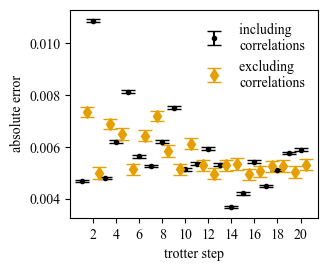

In [32]:
plt.figure(figsize=(3.375, 3.375 / 1.2))
# plt.errorbar(np.arange(1, 21, 1), np.zeros(20), fmt='.', color=colors[0], yerr=sdev_21, capsize=3,
#             label='including \ncorrelations')
# plt.errorbar(np.arange(1, 21, 1)+0.5, np.zeros(20), fmt='.', color=colors[1], yerr=sdev_12, capsize=3,
#             label='excluding \ncorrelations')
# plt.plot(np.arange(1, 21, 1), sdev_21, '.', color=colors[0], 
#             label='including \ncorrelations')
# plt.plot(np.arange(1, 21, 1)+0.5, sdev_12, 'd', color=colors[1], 
#             label='excluding \ncorrelations')
plt.errorbar(np.arange(1, 21, 1), sdev_21, yerr=boot_vars_2, fmt='.', capsize=5, color=colors[0], 
            label='including \ncorrelations')
plt.errorbar(np.arange(1, 21, 1)+0.5, sdev_12, yerr=boot_vars_1, fmt='d', capsize=5, color=colors[1], 
            label='excluding \ncorrelations')
plt.ylabel('absolute error')
plt.xlabel('trotter step')
plt.xticks([2 * i for i in range(1, 11)])
plt.legend(framealpha=0)
plt.tight_layout()
plt.savefig('relativecomparisonoferrorbars.pdf')

In [26]:
def comm(a, b):
    return a @ b - b @ a

In [27]:
massgap = []
m0s = np.linspace(0, 3, 100)
dt = 0.3
for m0 in m0s:
    h1 = np.diag([-m0, m0])
    h2 = np.array([[-0.5, 0.5], [0.5, 0.5]])
    u1 = expm(-1.0j * dt * h1 / 2)
    u2 = expm(-1.0j * dt * h2)
    utr = u1 @ u2 @ u1
    ham = -1.0j * logm(utr)
    
#     ham = (h1 + h2 - 0.3**2 / 24 * (comm(2 * h1, comm(h1, h2)) + comm(h2, comm(h1, h2)))) * 0.3
#     ham = np.array([[-m0 - 0.5, 0.5], [0.5, m0 + 0.5]])
    eigsys = np.linalg.eigh(ham)[0]
    if m0 == 1.0:
        hamsym = ham
    massgap.append(np.diff(eigsys))


In [28]:
istate = np.array([1, 1]) / np.sqrt(2)
obs = []
correlators = np.zeros((20, 20))
xop = np.array([[1, 0], [0, -1]]) * -0.5
for i in range(20):
    new_state = expm(-1.0j * (i + 1) * hamsym) @ istate
    obs.append(new_state.conjugate().transpose() @ (0.5 * np.diag([-1, 1])) @ new_state)
for i in range(1, 21):
    o1 = expm(1j * i * hamsym) @ xop @ expm(-1j * i * hamsym)
    for j in range(1, 21):
        o2 = expm(1j * j * hamsym) @ xop @ expm(-1j * j * hamsym)
        val = istate @ o2 @ o1 @ istate
        val -= istate @ o1 @ istate * istate @ o2 @ istate
        so1 = np.sqrt(0.25 - (istate @ o1 @ istate) **2)
        so2 = np.sqrt(0.25 - (istate @ o2 @ istate) **2)
#         print(val)
        correlators[i - 1, j - 1] = val
print(correlators)
print(obs)

[[0.24588033 0.22586715 0.19553177 0.18011717 0.19245028 0.22226837
  0.24475891 0.24120685 0.21456797 0.18700927 0.18146317 0.20254474
  0.23271138 0.24686053 0.23321826 0.20313671 0.18164763 0.18663274
  0.21394376 0.24085439]
 [0.22586715 0.20865742 0.17758439 0.15850484 0.16729545 0.19664127
  0.22212279 0.22253606 0.1975372  0.1679285  0.15834824 0.17676844
  0.20786111 0.22575311 0.21555596 0.18575503 0.16114855 0.16221231
  0.18806113 0.21718542]
 [0.19553177 0.17758439 0.15900954 0.15526391 0.16946435 0.18979425
  0.1993365  0.1901507  0.16988063 0.15539363 0.15874475 0.17714543
  0.19528391 0.19806663 0.183178   0.16300729 0.15433915 0.1643866
  0.18478886 0.19856859]
 [0.18011717 0.15850484 0.15526391 0.17309124 0.19715218 0.20742491
  0.19536118 0.17099958 0.15461212 0.1598353  0.18232275 0.203362
  0.20544565 0.18683985 0.16302703 0.15382255 0.16688573 0.19134631
  0.20684991 0.20049553]
 [0.19245028 0.16729545 0.16946435 0.19715218 0.22731907 0.23486225
  0.21350482 0.1810

/var/folders/df/plqx6fgd0_v3630nqhpjszf80000gq/T/ipykernel_24692/2312690182.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  correlators[i - 1, j - 1] = val


In [29]:
massgap[66]

array([1.52598109])

<ErrorbarContainer object of 3 artists>

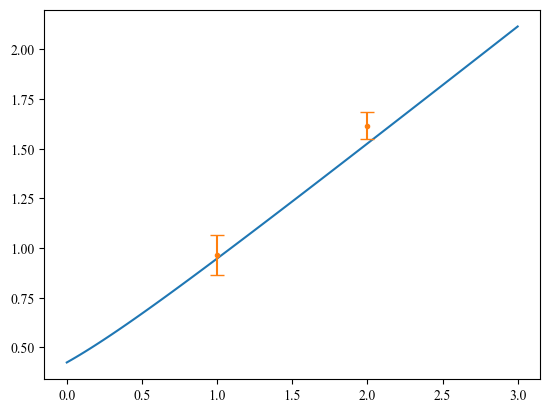

In [30]:
plt.plot(m0s, massgap)
plt.errorbar([1, 2], [0.966, 1.616],
             yerr=[.03 / 0.3, 0.02 / 0.3], fmt='.', capsize=5)

In [31]:
x = np.array([[0, 1], [1, 0]])
z = np.diag([1, -1])
y = np.array([[0, -1j], [1j, 0]])

xs = [np.kron(np.identity(2 ** i), np.kron(x, np.identity(2 ** (2 - i)))) for i in range(3)]
zs = [np.kron(np.identity(2 ** i), np.kron(z, np.identity(2 ** (2 - i)))) for i in range(3)]
ys = [np.kron(np.identity(2 ** i), np.kron(y, np.identity(2 ** (2 - i)))) for i in range(3)]

swap = 0.5 * (xs[0] @ xs[2] + ys[0] @ ys[2] + zs[0] @ zs[2] + np.identity(8))

iden = np.identity(8)

In [32]:
had = np.array([[1, 1], [1, -1]]) / np.sqrt(2)
had @ y @ had

array([[0.+0.j, 0.+1.j],
       [0.-1.j, 0.+0.j]])

In [33]:
np.kron(x, y) - np.kron(y, x)

array([[0.+0.j, 0.-0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+2.j, 0.+0.j],
       [0.+0.j, 0.-2.j, 0.+0.j, 0.-0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

In [34]:
hm = -0.5 * (xs[0] + xs[1] @ xs[0] + xs[2] @ xs[1] + xs[2])
hg = -0.5 * (sum(xs))
hk1 = 0.25 * (zs[0] @ (xs[1] + iden) + zs[2] @ (xs[1] + iden))
hk2 = 0.125 * ((xs[0] + iden) @ zs[1] @ (xs[2] + iden) + (iden - xs[0]) @ zs[1] @ (iden - xs[2]))
massgap7 = []
for m0 in m0s:
    u1 = expm(1.0j * dt * (hm * m0 + hg))
    u2 = expm(1.0j * hk1 * dt)
    u3 = expm(-1.0j * hk2 * dt)
    utr = u1 @ u2 @ u3
    ham = -1.0j * logm(utr)
    eigsys = np.linalg.eigh(ham)
    print(m0)
    if m0 == m0s[34]:
        eigsys_sim1 = ham
    if m0 == 2.0:
        eigsys_sim2 = ham
    massgap7.append(eigsys[0][1:] - eigsys[0][0])
# for m0 in m0s:
#     eigsys = np.linalg.eigh(m0 * hm + hg + hk)[0]
#     if m0 == 1:
#         print(eigsys - eigsys[0])
#     massgap7.append(eigsys[1:] - eigsys[0])
massgap7 = np.array(massgap7)

0.0
0.030303030303030304
0.06060606060606061
0.09090909090909091
0.12121212121212122
0.15151515151515152
0.18181818181818182
0.21212121212121213
0.24242424242424243
0.2727272727272727
0.30303030303030304
0.33333333333333337
0.36363636363636365
0.3939393939393939
0.42424242424242425
0.4545454545454546
0.48484848484848486
0.5151515151515151
0.5454545454545454
0.5757575757575758
0.6060606060606061
0.6363636363636364
0.6666666666666667
0.696969696969697
0.7272727272727273
0.7575757575757576
0.7878787878787878
0.8181818181818182
0.8484848484848485
0.8787878787878788
0.9090909090909092
0.9393939393939394
0.9696969696969697
1.0
1.0303030303030303
1.0606060606060606
1.0909090909090908
1.1212121212121213
1.1515151515151516
1.1818181818181819
1.2121212121212122
1.2424242424242424
1.2727272727272727
1.303030303030303
1.3333333333333335
1.3636363636363638
1.393939393939394
1.4242424242424243
1.4545454545454546
1.4848484848484849
1.5151515151515151
1.5454545454545454
1.5757575757575757
1.6060606060

In [35]:
eigsys_sim1[0]

array([ 0.06636602-7.21644966e-16j, -0.29815559+3.43614574e-02j,
       -0.01042343-5.24299741e-04j, -0.15392819+1.17271977e-02j,
       -0.29815559+3.43614574e-02j, -0.07156902-1.06464883e-02j,
       -0.15392819+1.17271977e-02j,  0.00164153-1.11707881e-02j])

In [36]:
istate = np.zeros(8)
istate = np.ones(8) / np.sqrt(8)
istate = np.kron(np.eye(2), np.kron(had, np.eye(2))) @ istate
obs = np.zeros(200)
oper = np.kron(x, np.kron(z, x))
tvals = np.linspace(0, 20, 200)
for i in range(len(obs)):
    nstate = expm(-1j * tvals[i] * eigsys_sim1) @ istate
    obs[i] = nstate.conjugate().transpose() @ oper @ nstate

/var/folders/df/plqx6fgd0_v3630nqhpjszf80000gq/T/ipykernel_24692/1498270714.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  obs[i] = nstate.conjugate().transpose() @ oper @ nstate


In [37]:
obs

array([ 1.00000000e+00,  9.95543257e-01,  9.82217624e-01,  9.60156446e-01,
        9.29580479e-01,  8.90795681e-01,  8.44190147e-01,  7.90230222e-01,
        7.29455828e-01,  6.62475052e-01,  5.89958051e-01,  5.12630332e-01,
        4.31265470e-01,  3.46677351e-01,  2.59711994e-01,  1.71239063e-01,
        8.21431233e-02, -6.68523999e-03, -9.43583774e-02, -1.80000496e-01,
       -2.62756463e-01, -3.41800404e-01, -4.16344002e-01, -4.85644419e-01,
       -5.49011755e-01, -6.05815973e-01, -6.55493211e-01, -6.97551426e-01,
       -7.31575307e-01, -7.57230403e-01, -7.74266438e-01, -7.82519760e-01,
       -7.81914919e-01, -7.72465340e-01, -7.54273105e-01, -7.27527829e-01,
       -6.92504653e-01, -6.49561373e-01, -5.99134739e-01, -5.41735959e-01,
       -4.77945457e-01, -4.08406940e-01, -3.33820839e-01, -2.54937192e-01,
       -1.72548029e-01, -8.74793662e-02, -5.82860055e-04,  8.72727712e-02,
        1.75210482e-01,  2.62353698e-01,  3.47835092e-01,  4.30805245e-01,
        5.10441115e-01,  

In [38]:
massgap7[65]

array([1.4992986 , 1.5178302 , 1.54709375, 1.8178302 , 1.8178302 ,
       2.09669824, 3.04606041])

In [39]:
swap @ (xs[2] + xs[0] + xs[1] @ xs[0] + xs[2] @ xs[1]) @ swap - (xs[0] + xs[2] + xs[2] @ xs[1] + xs[0] @ xs[1])
(xs[0] + xs[2] + xs[2] @ xs[1] + xs[0] @ xs[1]) - hm * 2

array([[0., 2., 0., 2., 2., 0., 2., 0.],
       [2., 0., 2., 0., 0., 2., 0., 2.],
       [0., 2., 0., 2., 2., 0., 2., 0.],
       [2., 0., 2., 0., 0., 2., 0., 2.],
       [2., 0., 2., 0., 0., 2., 0., 2.],
       [0., 2., 0., 2., 2., 0., 2., 0.],
       [2., 0., 2., 0., 0., 2., 0., 2.],
       [0., 2., 0., 2., 2., 0., 2., 0.]])

In [40]:
np.where(m0s == 1), massgap[33], 0.03 / 0.3, 2 * np.pi / 40

((array([33]),), array([0.94722867]), 0.1, 0.15707963267948966)

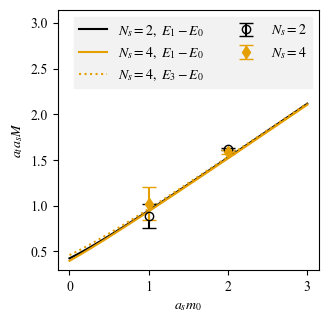

In [48]:
plt.figure(figsize=(3.375, 3.375))
plt.plot(m0s, massgap, color=colors[0], label=r'$N_s = 2,~E_1 - E_0$')
plt.plot(m0s, massgap7[:, 0], color=colors[1], label=r'$N_s = 4, ~E_1 - E_0$')
plt.plot(m0s, massgap7[:, 1], ':', color=colors[1], label=r'$N_s = 4, ~E_3 - E_0$')
# plt.errorbar([1, 2][0], [0.966, 1.616][0],
#              yerr=[.03 / 0.3, 0.02 / 0.3][0], fmt='o', color=colors[0], capsize=5, label=r'$N_s = 2$ $m_0 = 1$ Nairobi')
# plt.errorbar([1, 2][0], [1.045, 1.609][0],
#              yerr=[.03 / 0.3, 0.02 / 0.3][0], fmt='d', color=colors[1], capsize=5, fillstyle='none',
#             label=r'$N_s = 4$ $m_0 = 1$ Jakarta')
# plt.errorbar([1, 2][1], [0.966, 1.616][1],
#              yerr=[.03 / 0.3, 0.02 / 0.3][1], fmt='o', color=colors[0], capsize=5, fillstyle='none',
#             label=r'$N_s = 2$ $m_0 = 2$ Jakarta')
# plt.errorbar([1, 2][1], [1.045, 1.609][1],
#              yerr=[.03 / 0.3, 0.02 / 0.3][1], fmt='d', color=colors[1], capsize=5,
#             label=r'$N_s = 4$ $m_0 = 2$ Nairobi')
# plt.errorbar([1, 2][0], [0.966, 1.616][0],
#              yerr=[.03 / 0.3, 0.02 / 0.3][0], fmt='o', color=colors[0], capsize=5, label=r'$N_s = 2$ $m_0 = 1$ Nairobi')
# plt.errorbar([1, 2][0], [1.045, 1.609][0],
#              yerr=[.03 / 0.3, 0.02 / 0.3][0], fmt='d', color=colors[1], capsize=5, fillstyle='none',
#             label=r'$N_s = 4$ $m_0 = 1$ Jakarta')
# plt.errorbar([1, 2][0], [1.045, 1.609][0],
#              yerr=[.03 / 0.3, 0.02 / 0.3][0], fmt='d', color=colors[1], capsize=5, fillstyle='none',
#             label=r'$N_s = 4$ $m_0 = 1$ Jakarta')
#==============================

plt.errorbar([1, 2], [0.89, 1.619],
             yerr=[.13, 0.012], fmt='o', color=colors[0], capsize=5, fillstyle='none',
            label=r'$N_s = 2$')
plt.errorbar([1, 2], [1.02, 1.59],
             yerr=[0.18, 0.021], fmt='d', color=colors[1], capsize=5, fillstyle='full',
            label=r'$N_s = 4$')

plt.ylim(0.3, np.pi)
# plt.errorbar([1, 2], [0.966, 1.616],
#              yerr=[.03 / 0.3, 0.03 / 0.3], fmt='o', color=colors[0], capsize=5, fillstyle='none',
#             label=r'$N_s = 2$')

# plt.errorbar(2, 1.605, yerr=0.37 / 2, fmt='o', color=colors[0], capsize=5, fillstyle='none',
#             label=r'$N_s = 2$ $m_0 = 2$ Jakarta')
#==========================
# plt.errorbar([1, 2][1], [1.045, 1.55][1],
#              yerr=[.03 / 0.3, 0.03 / 0.3][1], fmt='d', color=colors[1], capsize=5,
#             label=r'$N_s = 4$ $m_0 = 2$ Nairobi')
# plt.errorbar([2], [1.497],
#              yerr=[0.37 / 2], fmt='d', color=colors[1], capsize=5,
#             label=r'$N_s = 4$ $m_0 = 2$ Nairobi')
plt.xlabel(r'$a_s m_0$')
plt.ylabel(r'$a_t a_s M$')
plt.legend(framealpha=1, shadow=False, edgecolor=(0.95, 0.95, 0.95),
           facecolor=(0.95, 0.95, 0.95), ncol=2, fancybox=False)
plt.savefig('plots/massdependencev4.pdf')

In [44]:
np.where(m0s == 1)

(array([33]),)

In [151]:
massgap7[33]

2.2495132525065085

In [10]:
exactm1n4 = np.array([ 0.62042, -0.1735 , -0.65614, -0.39714,  0.36114,  0.92978,
        0.79648,  0.09512, -0.52714, -0.51798,  0.10646,  0.76276,
        0.85798,  0.327  , -0.33226, -0.52226, -0.0963 ,  0.53878,
        0.78854,  0.44262])
exactm2n2 = np.array([ 0.07578, -0.96702, -0.1758 ,  0.9678 ,  0.32258, -0.90242,
       -0.4158 ,  0.86662,  0.555  , -0.77342, -0.6338 ,  0.71924,
        0.75256, -0.5955 , -0.8066 ,  0.51404,  0.89394, -0.37858,
       -0.92314,  0.27712])
exactm1n2 = np.array([1.0,
 0.611,
 -0.252,
 -0.8830000000000001,
 -0.8220000000000002,
 -0.10900000000000003,
 0.689,
 0.9960000000000001,
 0.537,
 -0.29799999999999993,
 -0.8810000000000001,
 -0.7659999999999999,
 0.010000000000000009,
 0.7550000000000001,
 0.976,
 0.46199999999999997,
 -0.396,
 -0.9229999999999999,
 -0.7050000000000001,
 0.03600000000000003,
 0.8380000000000001])
exactm2n4 = np.array([ 0.0954 , -0.84974,  0.01976,  0.9913 ,  0.1732 , -0.8156 ,
       -0.04822,  0.9668 ,  0.25644, -0.77522, -0.1183 ,  0.92816,
        0.32742, -0.72732, -0.17178,  0.87634,  0.38166, -0.66826,
       -0.21882,  0.81758])

np.savetxt('m_1ns_4exact.csv', exactm1n4, delimiter=',')
np.savetxt('m_2ns_4exact.csv', exactm2n4, delimiter=',')
np.savetxt('m_1ns_2exact.csv', exactm1n2, delimiter=',')
np.savetxt('m_2ns_2exact.csv', exactm2n2, delimiter=',')
